# Querying Point Clouds

1. Setup
2. 3-dimensional Points
3. Higher Dimensions

In [1]:
%config InlineBackend.figure_format = "retina"
%load_ext watermark
%watermark

Last updated: 2024-07-10T17:57:28.442134-04:00

Python implementation: CPython
Python version       : 3.12.4
IPython version      : 8.26.0

Compiler    : Clang 16.0.6 
OS          : Darwin
Release     : 23.5.0
Machine     : arm64
Processor   : arm
CPU cores   : 8
Architecture: 64bit



In [2]:
import matplotlib.pyplot as plt
import numpy

import fastpair

%watermark -w
%watermark -iv

Watermark: 2.4.3

numpy     : 2.0.0
fastpair  : 0.1.1.dev12+gb5fa448.d20240622
matplotlib: 3.9.0



---------------------------------

## 1. Setup

The following helper function will be used the generate random tuples of points in the example.

* A reproducibile state can be set with the `seed` argument.
* Use the `size` argument to indicate the tuple dimensions.
* Set the `n` argument for the number of desired points
* `low` and `high` control for minimum and maximum values, respectively.
* The [desired distribution](https://numpy.org/doc/stable/reference/random/generator.html#numpy.random.default_rng) is set in `sample`. 

In [3]:
def random_points(
    seed: int = 0,
    size: int | tuple = (2),
    n: int = 1,
    low: int = 0,
    high: int = 20,
    sample: str = "uniform",
) -> list[tuple[float]]:
    rng = numpy.random.default_rng(seed)
    return [
        tuple(getattr(rng, sample)(low=low, high=high, size=size)) for i in range(n)
    ]

Generate a single 1D point from seed `0`

In [4]:
random_points(1, 1, 1)

[(np.float64(10.236432494005134),)]

Generate 3 2D points from seed `1`

In [5]:
random_points(1, (2), 3)

[(np.float64(10.236432494005134), np.float64(19.009273926518706)),
 (np.float64(2.8831922543926747), np.float64(18.972988942744877)),
 (np.float64(6.236629040209709), np.float64(8.466528979451514))]

---------------------

## 2. 3-dimensional Points

Generate a random set of 4 3D points and build a `fastpair.FastPair` object.

In [6]:
points = random_points(101, (3), 4)
fp = fastpair.FastPair()
fp.build(points)

<FastPair[min_points=10, dist=euclidean]
 Current state: initialized with 4 3D points>

### Explore the current state of the `fp` instance

#### Query the closest pair

In [7]:
dist, (a, b) = fp.closest_pair()
dist, (a, b)

(4.0502751383410684,
 ((np.float64(18.870650112211077),
   np.float64(7.188420666831464),
   np.float64(15.696108239399543)),
  (np.float64(17.38663089357139),
   np.float64(7.282768525810457),
   np.float64(19.463536292657878))))

The closest pair is `≈4.05` units apart.

#### Visualize
* 3 initial points in `"cadetblue"`
* Current closest pair in `"red"`

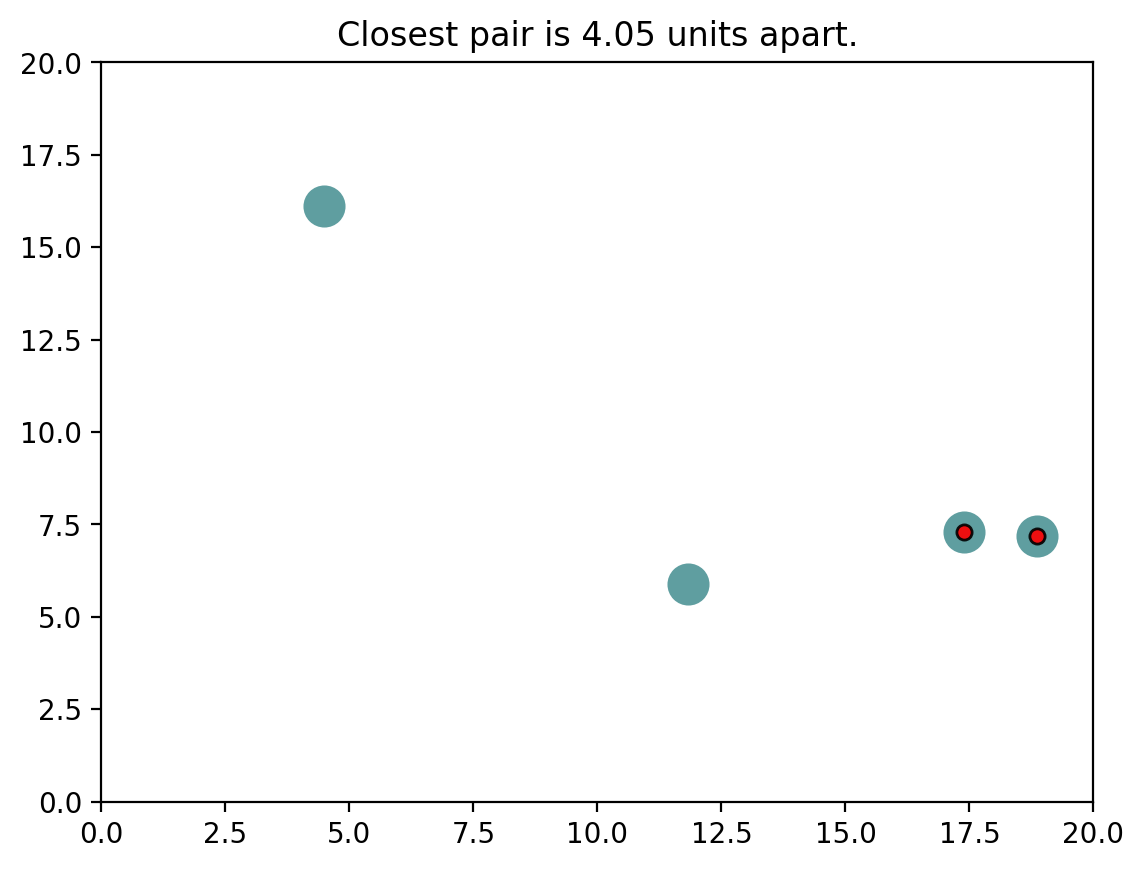

In [8]:
_first_4 = numpy.array(list(zip(*fp.points, strict=True))).T[:, :2][:4].T
_closest = numpy.array(list(zip(a, b, strict=True))).T[:, :2].T

plt.scatter(*_first_4, s=200, color="cadetblue")
plt.scatter(*_closest, s=30, color="red", ec="k", alpha=0.9)
plt.xlim(0, 20)
plt.ylim(0, 20)
plt.title(f"Closest pair is {dist:.3} units apart.");

#### Append 3 points

Add 3 3D points with the `+=` operator and query again.

In [9]:
for p in range(4):
    fp += tuple(*random_points(p, (3), 1))

#### Query the closest pair

In [10]:
dist, (a, b) = fp.closest_pair()
dist, (a, b)

(3.738192198648357,
 ((np.float64(1.7129833428724872),
   np.float64(4.736210131921994),
   np.float64(16.025489304127937)),
  (np.float64(5.232242684986328),
   np.float64(5.969822868282466),
   np.float64(16.284514811885607))))

The closest pair is `≈3.78` units apart.

#### Visualize

* 3 initial points in `"cadetblue"`
* 3 additional points in `"goldenrod"`
* Current closest pair in `"red"`

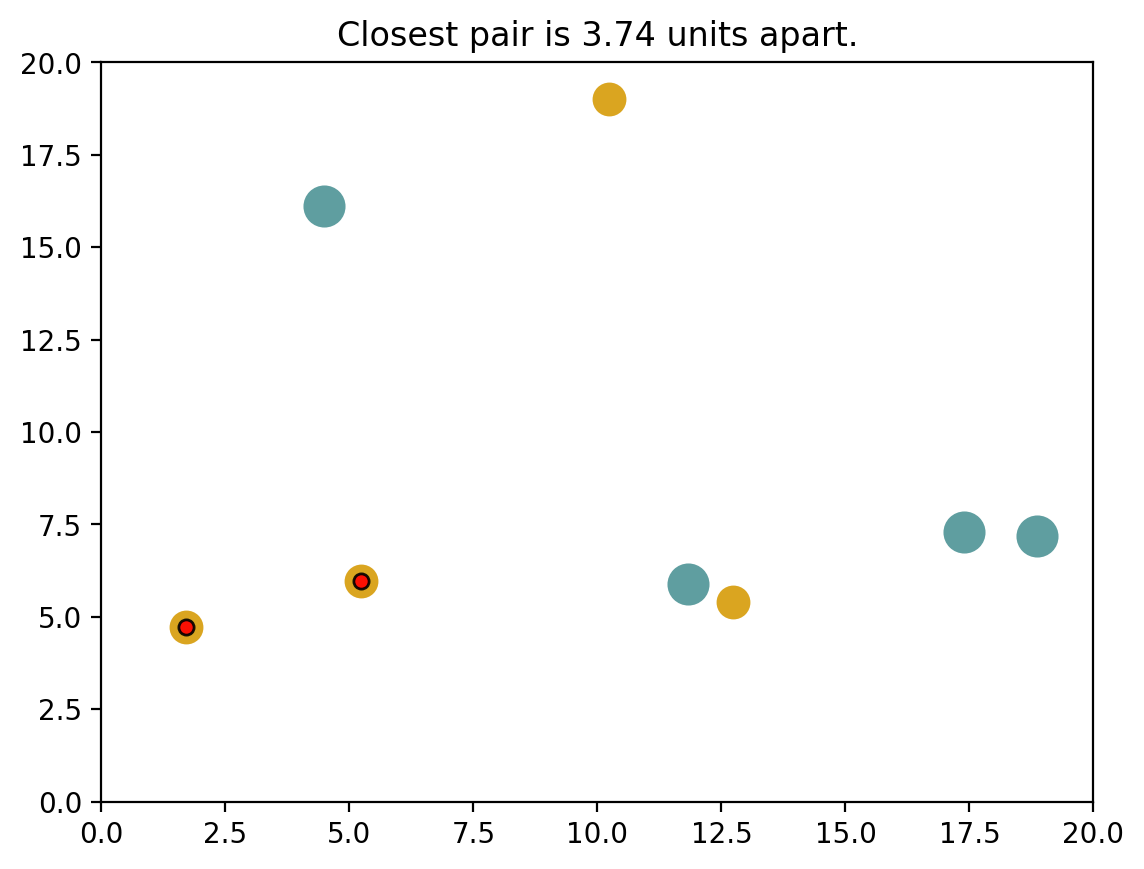

In [11]:
_first_4 = numpy.array(list(zip(*fp.points, strict=True))).T[:, :2][:4].T
_second_4 = numpy.array(list(zip(*fp.points, strict=True))).T[:, :2][4:].T
_closest = numpy.array(list(zip(a, b, strict=True))).T[:, :2].T

plt.scatter(*_first_4, s=200, color="cadetblue")
plt.scatter(*_second_4, s=125, color="goldenrod")
plt.scatter(*_closest, s=30, color="red", ec="k", alpha=0.9)
plt.xlim(0, 20)
plt.ylim(0, 20)
plt.title(f"Closest pair is {dist:.3} units apart.");

But is something going wrong here? It appears the new closest pair are farther apart than the original...

This is because we are still considering only 2 dimensions. Let's plot again while incorporating the 3rd dimension.

#### Visualize 3D

* 3 initial points in `"cadetblue"`
* 3 additional points in `"goldenrod"`
* Current closest pair in `"red"`

Closest pair is 3.7 units apart.


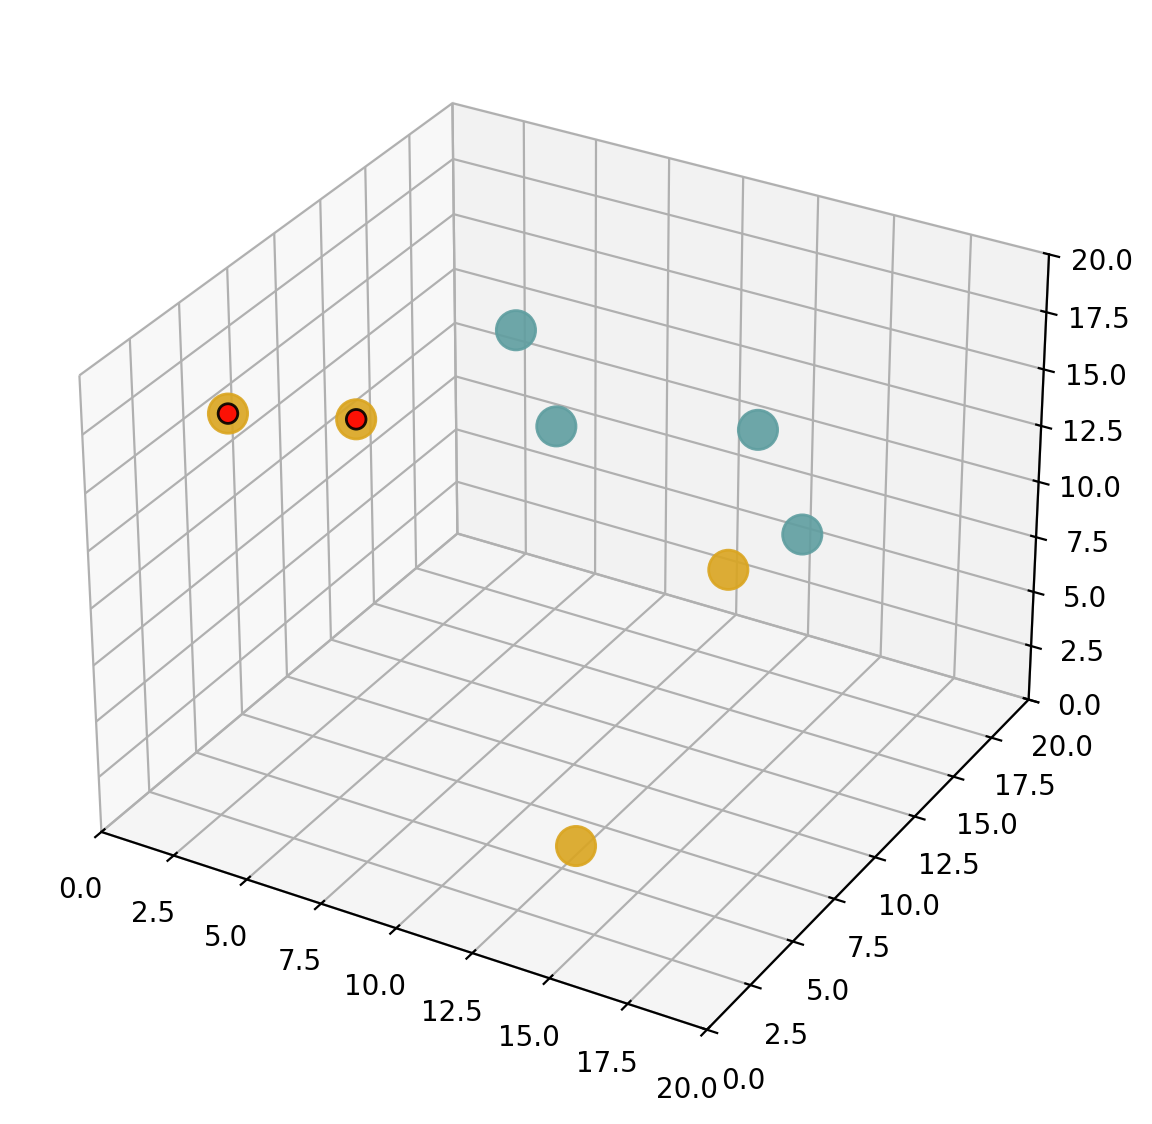

In [12]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(projection="3d")

ax.scatter(*zip(*fp.points[:4], strict=True), s=200, alpha=0.9, color="cadetblue")
ax.scatter(*zip(*fp.points[4:], strict=True), s=200, alpha=0.9, color="goldenrod")
ax.scatter(
    *numpy.array(list(zip(a, b, strict=True))), s=50, color="red", ec="k", alpha=0.9
)

ax.axes.set_xlim3d(left=0, right=20)
ax.axes.set_ylim3d(bottom=0, top=20)
ax.axes.set_zlim3d(bottom=0, top=20)

print(f"Closest pair is {dist:.2} units apart.");

By plotting with the 3rd dimension the updated closest pair makes more sense.

## 3. Higher Dimensions

It may be tough for humans to think about dimensions higher than 3, but not for `fastpair`. Next, let's generate 100 4D points and build the data structure.

In [13]:
points = random_points(101, (4), 100)
fp = fastpair.FastPair()
fp.build(points)

<FastPair[min_points=10, dist=euclidean]
 Current state: initialized with 100 4D points>

#### Verify the number of points generated

In [14]:
len(fp)

100

#### Explore the first and last two points

In [15]:
fp.points[:2], fp.points[-2:]

([(np.float64(18.870650112211077),
   np.float64(7.188420666831464),
   np.float64(15.696108239399543),
   np.float64(11.825563704588236)),
  (np.float64(19.463536292657878),
   np.float64(4.490486614702625),
   np.float64(16.10991735856244),
   np.float64(13.617924625616881))],
 [(np.float64(6.281485191595186),
   np.float64(15.617152919852579),
   np.float64(18.501034362350563),
   np.float64(0.8032379106434839)),
  (np.float64(19.60606658563202),
   np.float64(0.9476558986387795),
   np.float64(18.152996427027382),
   np.float64(3.1155672960451475))])

#### Query the closest pair

In [16]:
dist, (a, b) = fp.closest_pair()
dist, (a, b)

(1.471913992306667,
 ((np.float64(12.143319051427731),
   np.float64(8.096696612806012),
   np.float64(8.069117114956994),
   np.float64(1.7566196855998584)),
  (np.float64(12.855616484647092),
   np.float64(8.883192737858987),
   np.float64(7.978835783535024),
   np.float64(0.7405309621851197))))

The closest pair is `≈1.472` units apart.

Since visualizing data in more than 3 dimensions is difficult at best, next we'll look at `fastpair`'s performance.

### Performance

This next section demonstrates an example workflow of creating a `fastpair.FastPair` object and appending points while profiling run time. We will generate an initial set of 100 7D points (integers between 10-99) and then a second set with the same parameters. We query the data structure after the initial object is built and again after the addition of the second set. The profile is run twice for 3 loops each.

In [17]:
%%timeit -n 2 -r 3

dimensions = 7
n_points = 100
kwargs = {"low": 10, "high": 99, "sample": "integers"}

fp = fastpair.FastPair()
fp.build(random_points(101, (dimensions), n_points, **kwargs))
print(f"points={len(fp)}, {dimensions=}\n  {fp.closest_pair()=}")

for p in range(n_points):
    fp += tuple(*random_points(p * p, (dimensions), 1, **kwargs))

print(f"points={len(fp)}, {dimensions=}\n  {fp.closest_pair()=}\n")

points=100, dimensions=7
  fp.closest_pair()=(np.float64(22.22611077089287), ((np.int64(75), np.int64(82), np.int64(62), np.int64(53), np.int64(97), np.int64(30), np.int64(37)), (np.int64(77), np.int64(89), np.int64(72), np.int64(61), np.int64(97), np.int64(44), np.int64(46))))
points=200, dimensions=7
  fp.closest_pair()=(np.float64(15.491933384829668), ((np.int64(62), np.int64(28), np.int64(18), np.int64(58), np.int64(90), np.int64(59), np.int64(24)), (np.int64(60), np.int64(33), np.int64(17), np.int64(52), np.int64(92), np.int64(58), np.int64(37))))

points=100, dimensions=7
  fp.closest_pair()=(np.float64(22.22611077089287), ((np.int64(75), np.int64(82), np.int64(62), np.int64(53), np.int64(97), np.int64(30), np.int64(37)), (np.int64(77), np.int64(89), np.int64(72), np.int64(61), np.int64(97), np.int64(44), np.int64(46))))
points=200, dimensions=7
  fp.closest_pair()=(np.float64(15.491933384829668), ((np.int64(62), np.int64(28), np.int64(18), np.int64(58), np.int64(90), np.int64(59

#### This workflow runs in ≈60 milliseconds

* *Timing will vary across machines, sofware versions, and runs themselves*. 

---------------------------